In [1]:
# import the necessary library
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [3]:
# calling the data 
data = pd.read_excel("C:/Users/Faizm/Desktop/marvick/Bankruptcy_data.xlsx")

In [4]:
# checking the data what it consists of rows and columns
data.head()

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
0,1.58,0.36,0.18,0.13,1.33,1.77,0.07,0.15,2.22,NaN,NaN,NaN,0
1,1.41,0.36,0.19,0.12,1.31,1.59,0.07,0.13,2.41,0.126319,0.014278,0.040179,0
2,0.31,0.32,0.13,0.08,1.03,1.55,0.05,0.04,2.56,0.368077,0.327909,0.566524,0
3,0.71,0.28,0.14,0.08,0.80,1.39,0.06,0.05,5.28,-0.020809,-0.118904,-0.095890,0
4,0.75,0.41,0.13,0.08,0.20,1.30,0.06,0.04,8.68,0.233089,0.146807,0.053030,0


In [5]:
#Checking the number of rows and columns 
data.shape

(92872, 13)

In [6]:
#Checking for the basic calCulations
data.describe().T

,count,mean,std,min,25%,50%,75%,max
EPS,92867.0,-14.461355,2195.467288,-3.840000e+05,-0.140000,0.330000,1.530000,55339.00
Liquidity,92625.0,-2.631237,121.610921,-2.596852e+04,0.020000,0.190000,0.400000,1.00
Profitability,92625.0,-29.537274,677.230667,-7.968200e+04,-0.640000,0.070000,0.310000,140.58
Productivity,92625.0,-1.222870,35.885556,-5.093000e+03,-0.060000,0.060000,0.110000,1102.00
Leverage Ratio,92846.0,1.345316,253.038093,-7.811000e+03,0.000000,0.280000,0.820000,75970.38
Asset Turnover,92625.0,1.053613,2.115945,-3.159000e+01,0.390000,0.830000,1.390000,276.38
Operational Margin,87315.0,-7.915485,214.460079,-3.017570e+04,-0.030000,0.060000,0.140000,394.47
Return on Equity,92864.0,-2.112382,352.596902,-8.887514e+04,-0.080000,0.030000,0.070000,39500.00
Market Book Ratio,92815.0,358.506265,26063.637981,-3.151500e+06,11.200000,58.280000,240.140000,3455419.33
Assets Growth,86171.0,1.294075,73.769522,-1.000000e+00,-0.052596,0.051844,0.192062,14231.00


In [7]:
# checking the data type of each function
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92872 entries, 0 to 92871
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EPS                 92867 non-null  float64
 1   Liquidity           92625 non-null  float64
 2   Profitability       92625 non-null  float64
 3   Productivity        92625 non-null  float64
 4   Leverage Ratio      92846 non-null  float64
 5   Asset Turnover      92625 non-null  float64
 6   Operational Margin  87315 non-null  float64
 7   Return on Equity    92864 non-null  float64
 8   Market Book Ratio   92815 non-null  float64
 9   Assets Growth       86171 non-null  float64
 10  Sales Growth        86171 non-null  float64
 11  Employee Growth     85862 non-null  float64
 12  BK                  92872 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 9.2 MB


In [8]:
#Checking for null values
data.isna().sum()

EPS                      5
Liquidity              247
Profitability          247
Productivity           247
Leverage Ratio          26
Asset Turnover         247
Operational Margin    5557
Return on Equity         8
Market Book Ratio       57
Assets Growth         6701
Sales Growth          6701
Employee Growth       7010
BK                       0
dtype: int64

In [9]:
# under this i am droping the columns where the null values are not high
data = data.dropna(subset=['EPS', 'Return on Equity', 'Leverage Ratio', 'Market Book Ratio'])

In [10]:
data.isna().sum()

EPS                      0
Liquidity              228
Profitability          228
Productivity           228
Leverage Ratio           0
Asset Turnover         228
Operational Margin    5527
Return on Equity         0
Market Book Ratio        0
Assets Growth         6686
Sales Growth          6686
Employee Growth       6988
BK                       0
dtype: int64

In [11]:
# under this i will be changing the null values with median value on these specified columns as the null value in these columns are very high
columns_to_fill = ['Liquidity', 'Profitability', 'Productivity', 'Asset Turnover', 
                   'Operational Margin', 'Assets Growth', 'Sales Growth', 'Employee Growth']

for column in columns_to_fill:
    data[column] = data[column].fillna(data[column].median())


In [12]:
data.isna().sum()

EPS                   0
Liquidity             0
Profitability         0
Productivity          0
Leverage Ratio        0
Asset Turnover        0
Operational Margin    0
Return on Equity      0
Market Book Ratio     0
Assets Growth         0
Sales Growth          0
Employee Growth       0
BK                    0
dtype: int64

In [13]:
#Checking for duplicated values as the value are not very high 
data.duplicated().sum()

27

In [14]:
columns = data.columns

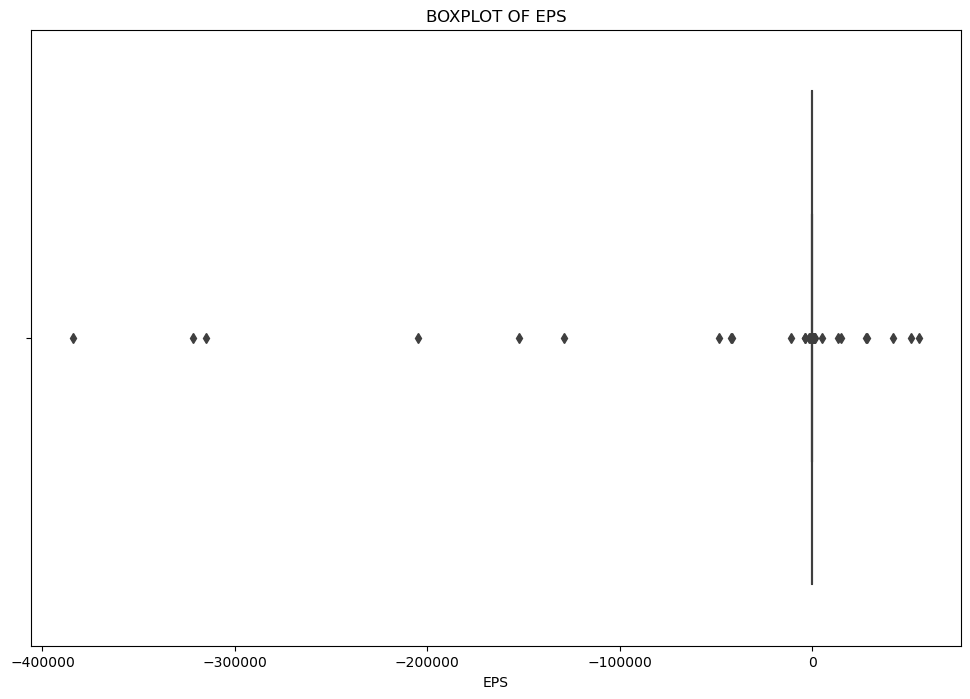

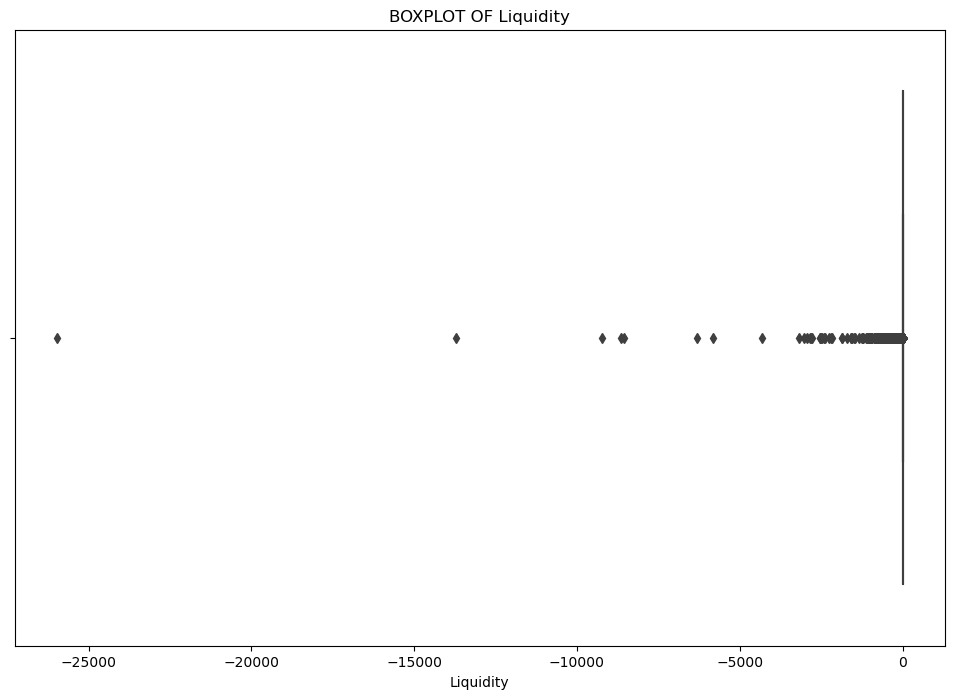

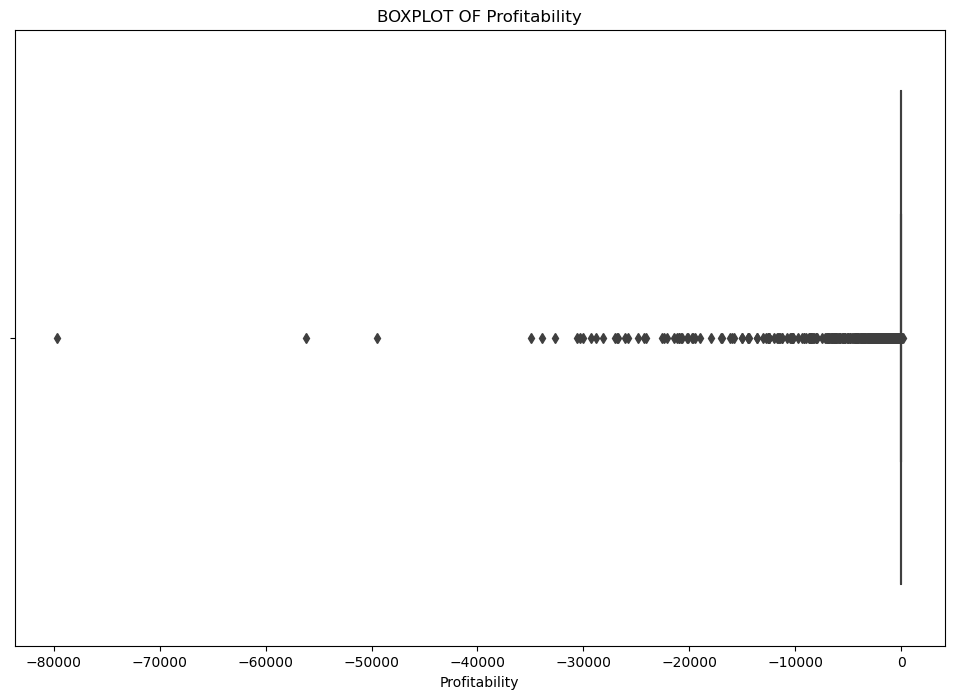

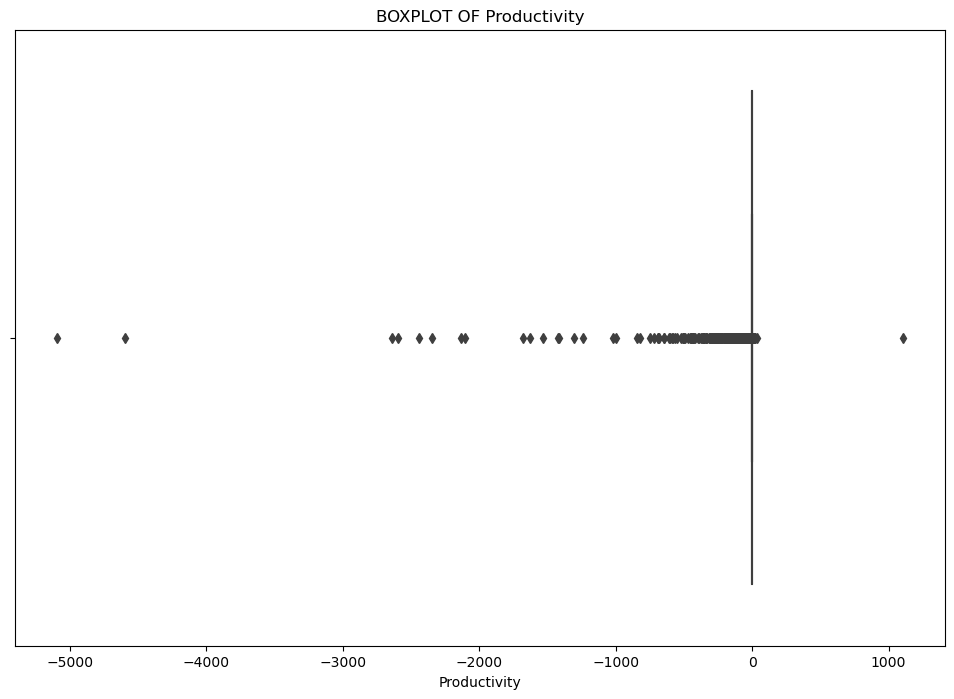

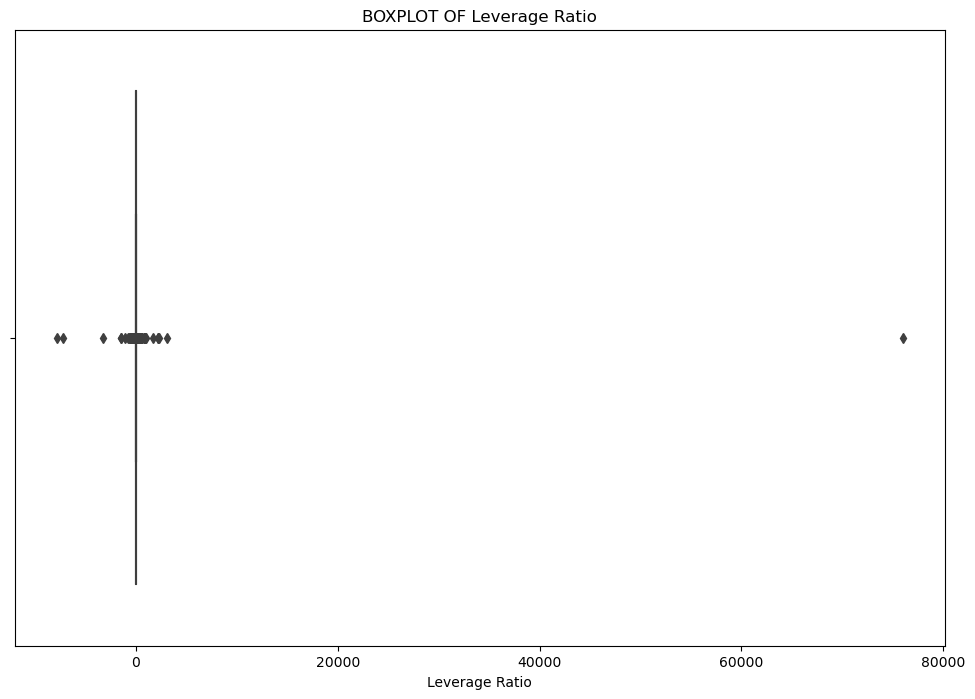

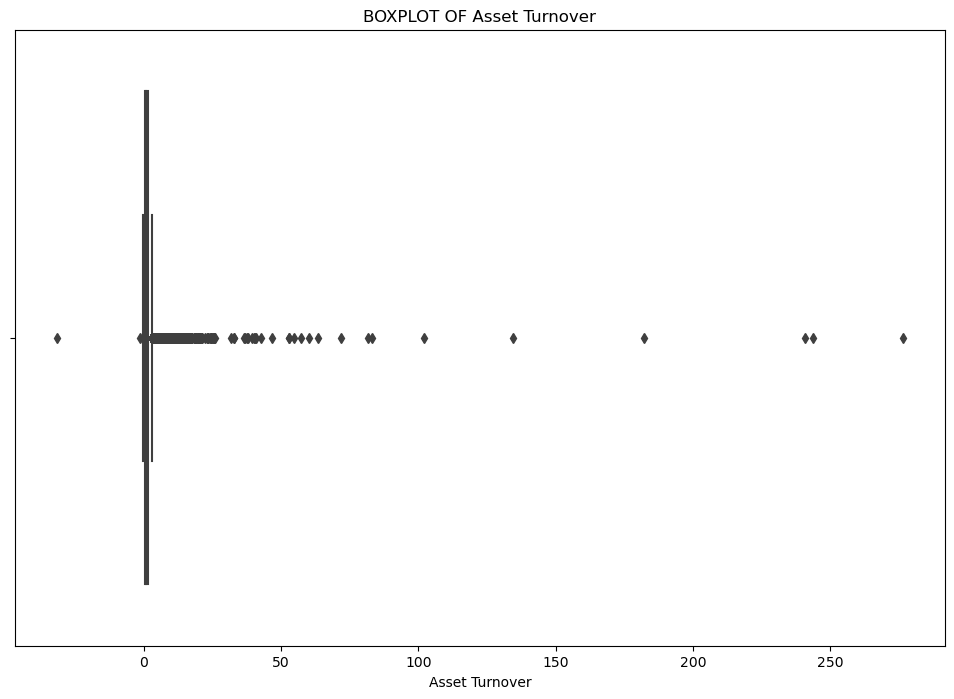

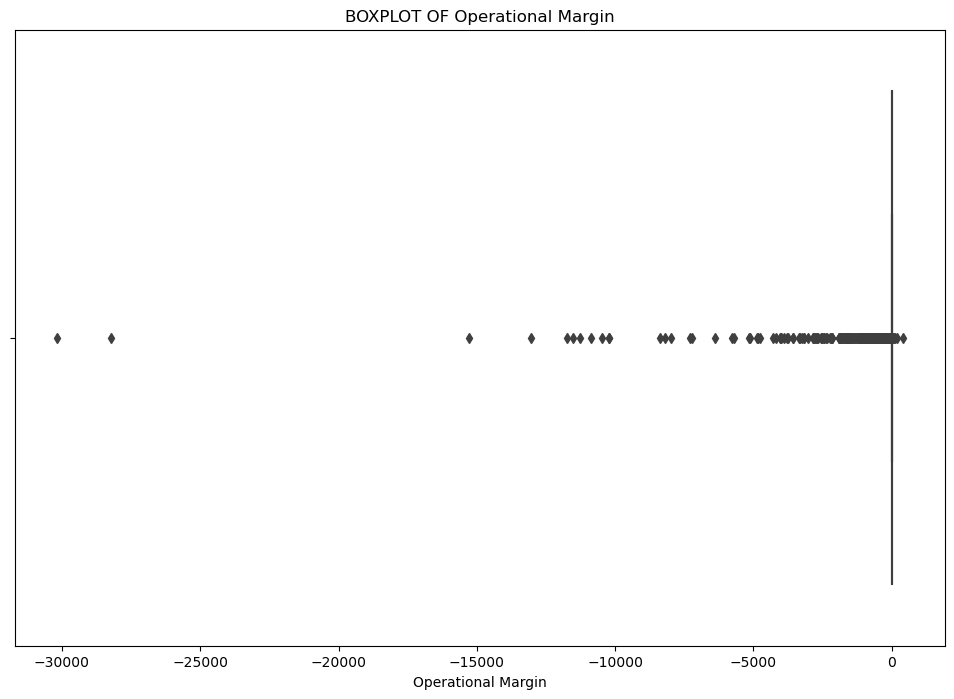

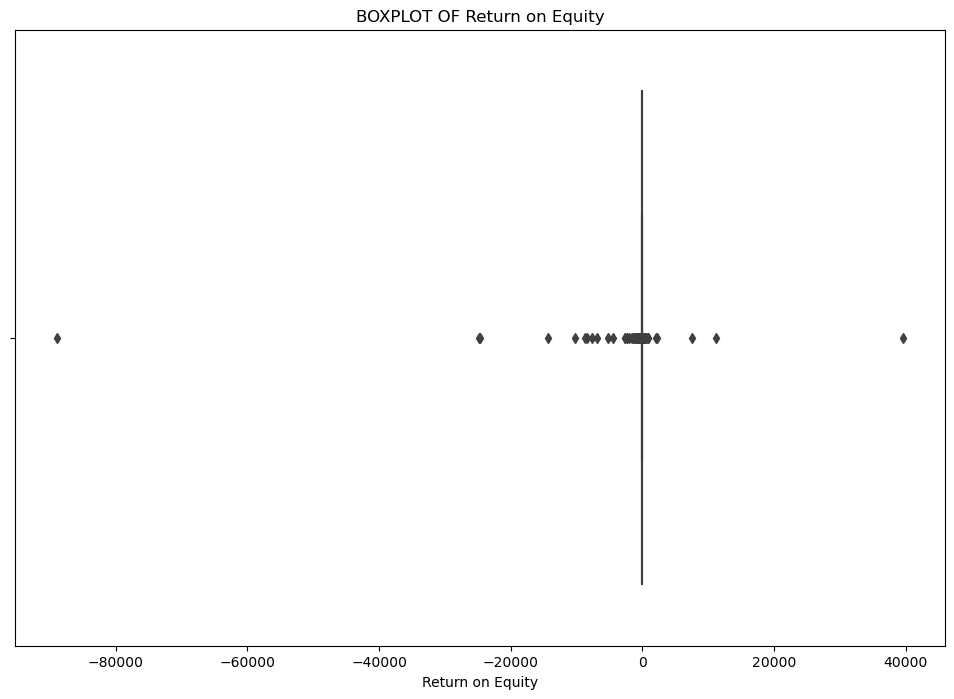

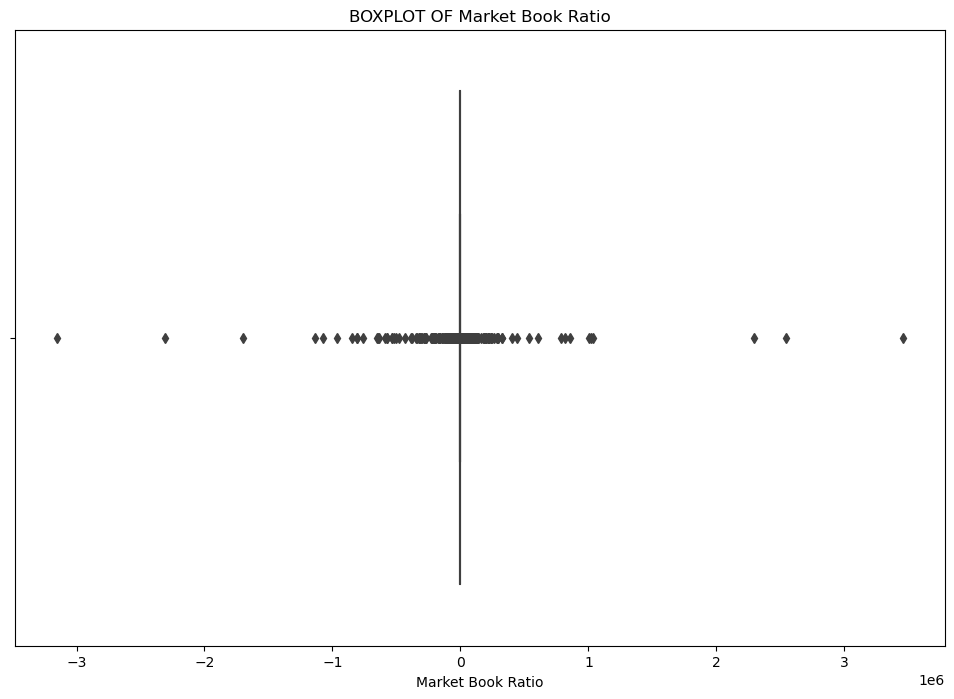

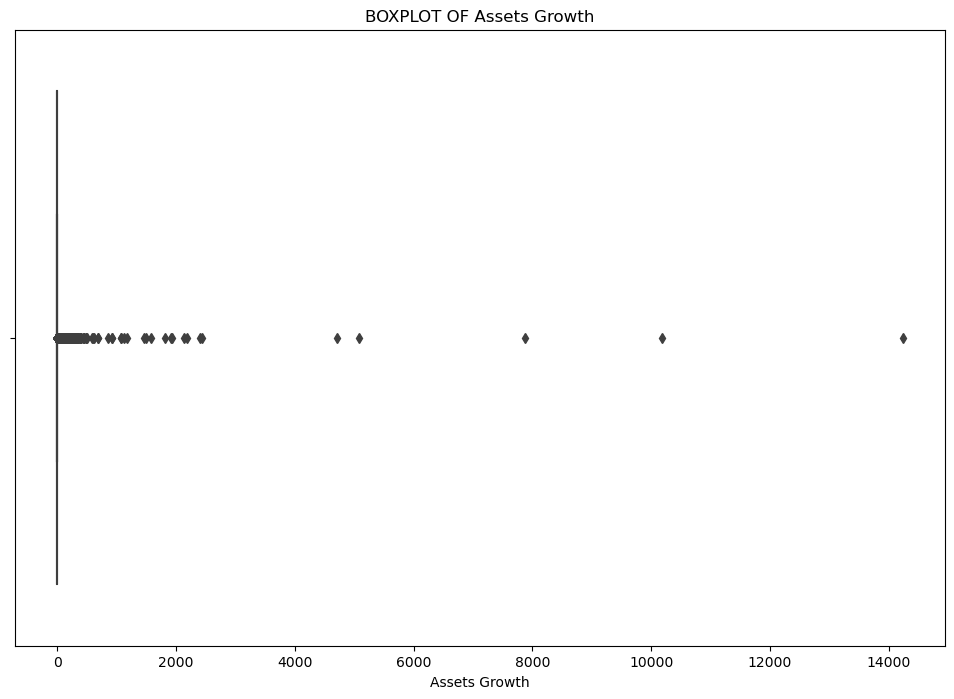

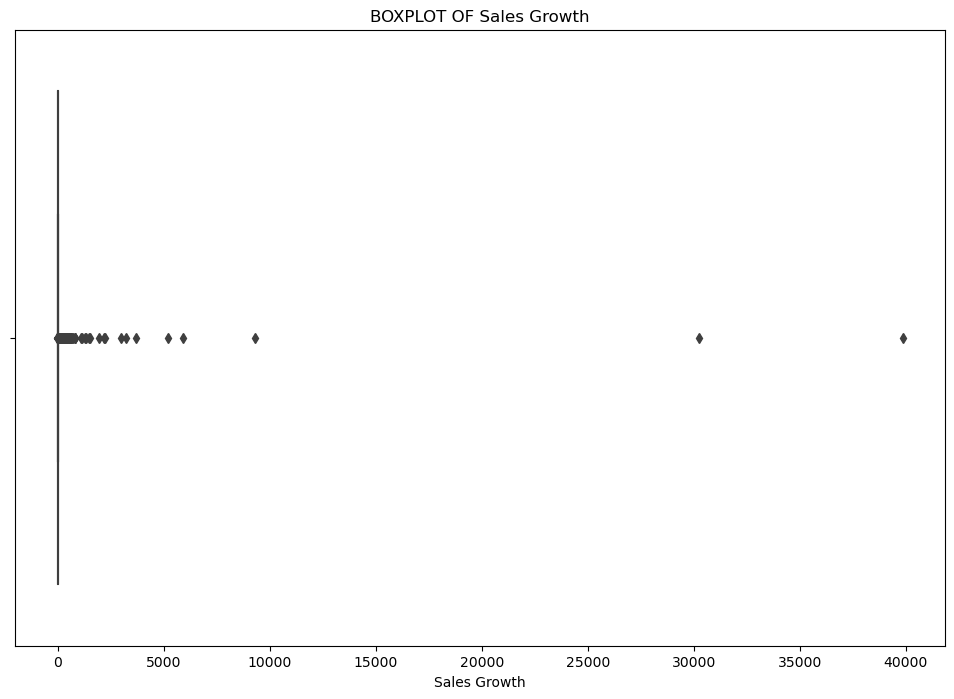

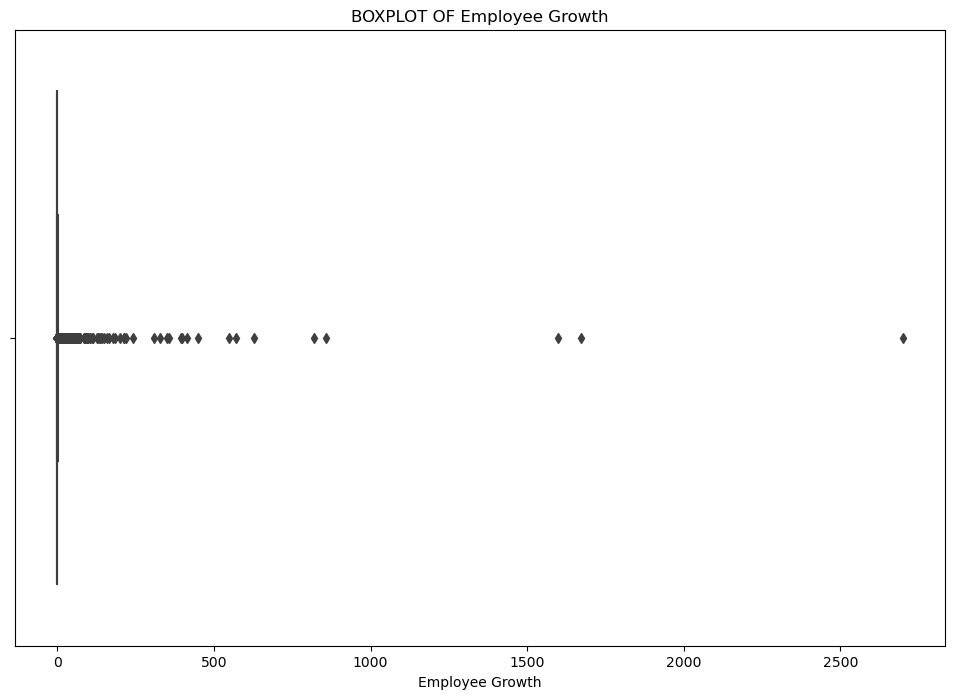

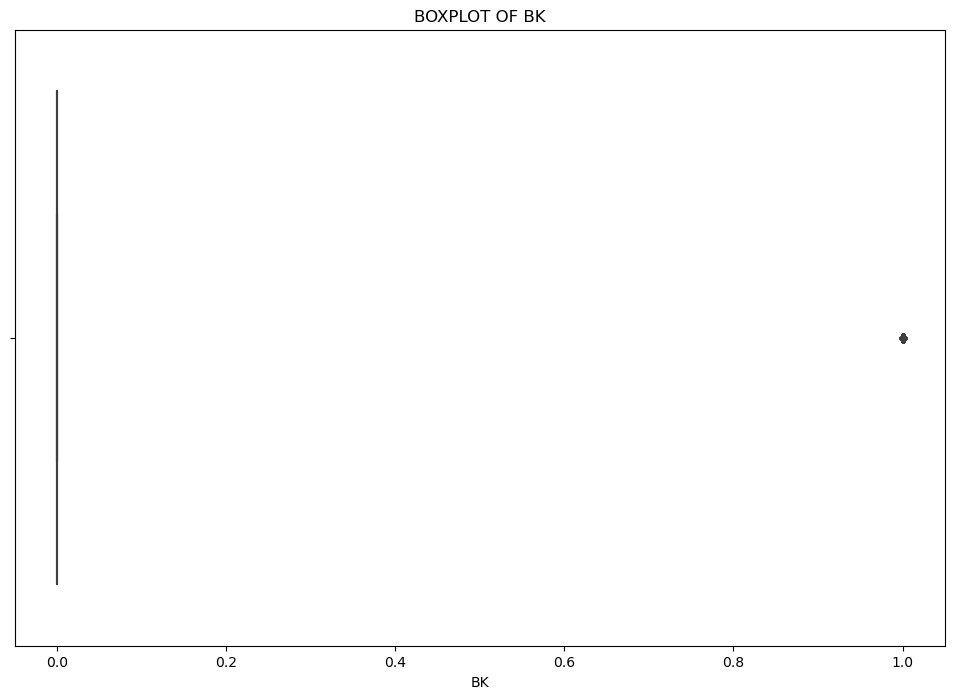

In [15]:
# checking for outliers
for column in columns:
    plt.figure(figsize=(12, 8))
    sns.boxplot(x=data[column].dropna())
    plt.title(f'BOXPLOT OF {column}')
    plt.xlabel(column)
    plt.show()

In [16]:
# making a correation matrix
data.corr()

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
EPS,1.000000,-0.000129,-0.000280,-0.000210,0.000025,0.000969,-0.000211,0.248414,0.000107,0.000071,0.000067,0.000172,-0.007264
Liquidity,-0.000129,1.000000,0.471303,0.229424,0.000146,-0.035121,0.002596,0.582774,0.001385,0.000485,0.000251,0.000810,0.001182
Profitability,-0.000280,0.471303,1.000000,0.431899,0.000277,-0.039166,0.006082,0.106636,-0.004009,0.000834,0.000448,0.001310,0.002400
Productivity,-0.000210,0.229424,0.431899,1.000000,0.000225,-0.021876,0.015055,0.001029,0.005993,0.000485,0.000296,0.001033,0.001302
Leverage Ratio,0.000025,0.000146,0.000277,0.000225,1.000000,-0.001192,0.000294,-0.000013,0.030031,-0.000089,0.000101,-0.000056,-0.000118
Asset Turnover,0.000969,-0.035121,-0.039166,-0.021876,-0.001192,1.000000,0.017168,-0.005024,-0.006022,-0.003929,0.000003,-0.002997,0.015382
Operational Margin,-0.000211,0.002596,0.006082,0.015055,0.000294,0.017168,1.000000,0.001943,0.004989,-0.000780,0.000375,0.000111,0.001619
Return on Equity,0.248414,0.582774,0.106636,0.001029,-0.000013,-0.005024,0.001943,1.000000,0.000082,0.000102,0.000055,0.000142,-0.004259
Market Book Ratio,0.000107,0.001385,-0.004009,0.005993,0.030031,-0.006022,0.004989,0.000082,1.000000,-0.000492,-0.000697,0.000185,-0.000882
Assets Growth,0.000071,0.000485,0.000834,0.000485,-0.000089,-0.003929,-0.000780,0.000102,-0.000492,1.000000,0.073821,0.012921,-0.001285


<Axes: >

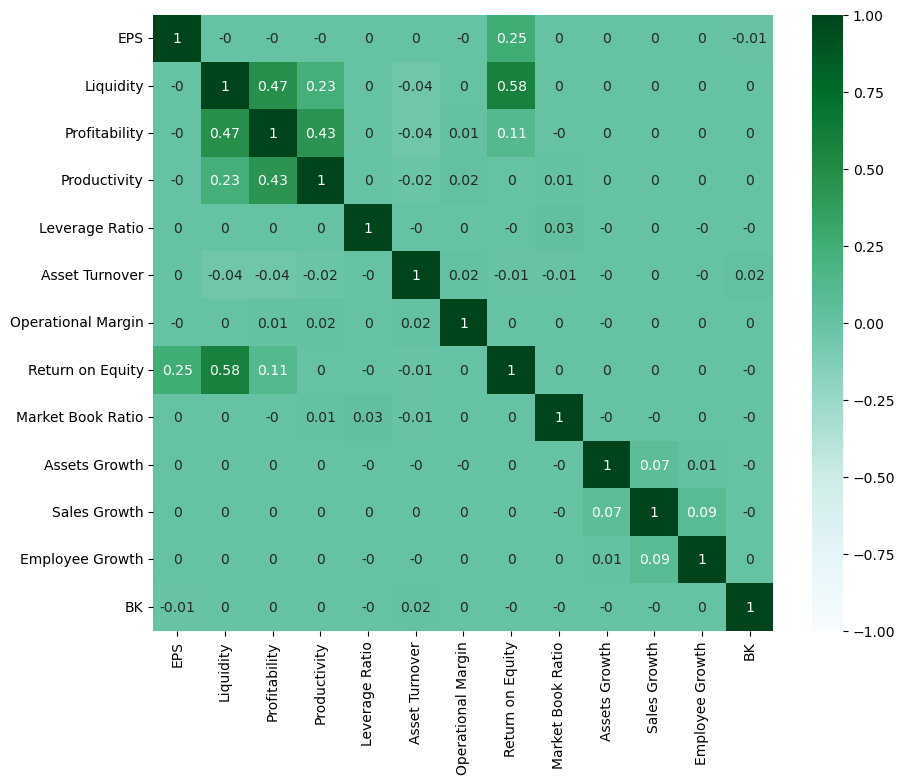

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr().round(2), annot=True,cmap='BuGn', vmin=-1, vmax=1)

In [23]:
columns

Index(['EPS', 'Liquidity', 'Profitability', 'Productivity', 'Leverage Ratio',
       'Asset Turnover', 'Operational Margin', 'Return on Equity',
       'Market Book Ratio', 'Assets Growth', 'Sales Growth', 'Employee Growth',
       'BK'],
      dtype='object')

In [25]:
# splitting the data into X and y
X=data.drop('BK',axis=1)
y=data['BK']

In [26]:
# checking for the number of "Yes(1)" and "No(0)" in the BK column
data['BK'].value_counts()

BK
0    92256
1      549
Name: count, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

(array([64584.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   379.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

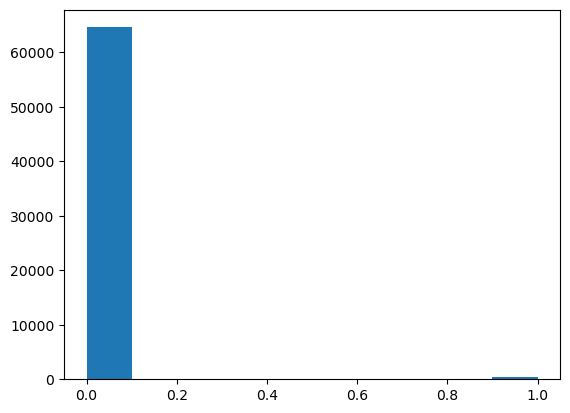

In [28]:
plt.hist(y_train)

In [30]:
from imblearn.over_sampling import SMOTE
# Oversampling the minority class
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

(array([64584.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 64584.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

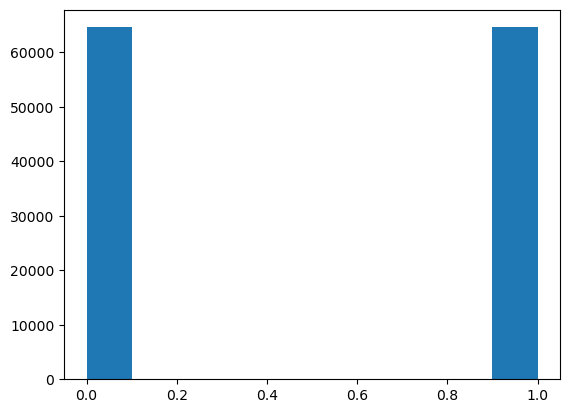

In [31]:
plt.hist(y_train)

In [32]:
# Scale the features
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rfc_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rfc_model.fit(scaled_X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [35]:
y_predict = rfc_model.predict(scaled_X_test)

In [36]:
print("Random Forest Classification Report :")
print(classification_report(y_test, y_predict))

Random Forest Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     27672
           1       0.14      0.33      0.20       170

    accuracy                           0.98     27842
   macro avg       0.57      0.66      0.60     27842
weighted avg       0.99      0.98      0.99     27842



In [40]:
print("\nRandom Forest Confusion Matrix :")
print(confusion_matrix(y_test, y_predict))


Random Forest Confusion Matrix :
[[27337   335]
 [  114    56]]


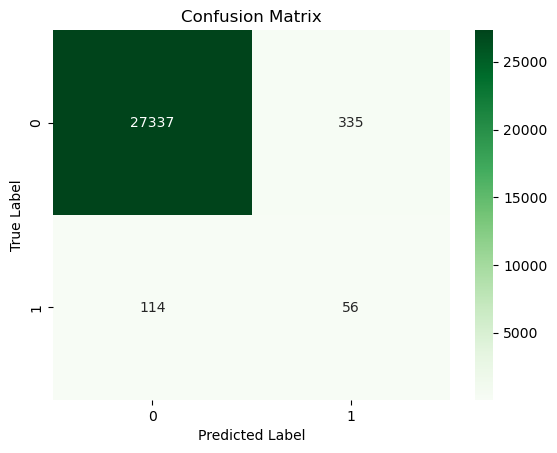

In [41]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_predict)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt="d",cmap ='Greens')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [43]:
model = RandomForestClassifier()
criterion = ['gini', 'entropy']
max_depth = [2, 5, 10, 20]
max_leaf_nodes = [2, 5, 10, 20]
n_estimators = [10, 25, 50, 100]
params = {'criterion':criterion, 'max_depth':max_depth, 'max_leaf_nodes':max_leaf_nodes, 'n_estimators':n_estimators}
grid = GridSearchCV(model, params, cv=2,verbose=2,scoring='f1_macro')

In [45]:
grid.fit(scaled_X_train, y_train)

Fitting 2 folds for each of 128 candidates, totalling 256 fits
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=2, n_estimators=10; total time=   0.9s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=2, n_estimators=10; total time=   1.0s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=2, n_estimators=25; total time=   2.3s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=2, n_estimators=25; total time=   2.4s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=2, n_estimators=50; total time=   4.8s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=2, n_estimators=50; total time=   5.3s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=2, n_estimators=100; total time=  10.2s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=2, n_estimators=100; total time=  10.2s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=5, n_estimators=10; total time=   1.2s
[CV] END criterion=gini, max_depth=2, max_leaf_nodes=5, n_estimators=10; total time=   1.0s
[CV] END criter

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 10, 20],
                         'max_leaf_nodes': [2, 5, 10, 20],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='f1_macro', verbose=2)

In [47]:
y_pred_grid = grid.predict(scaled_X_test)

In [48]:
print("Random Forest Classification Report :")
print(classification_report(y_test,y_pred_grid))

Random Forest Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.87      0.93     27672
           1       0.04      0.81      0.07       170

    accuracy                           0.86     27842
   macro avg       0.52      0.84      0.50     27842
weighted avg       0.99      0.86      0.92     27842



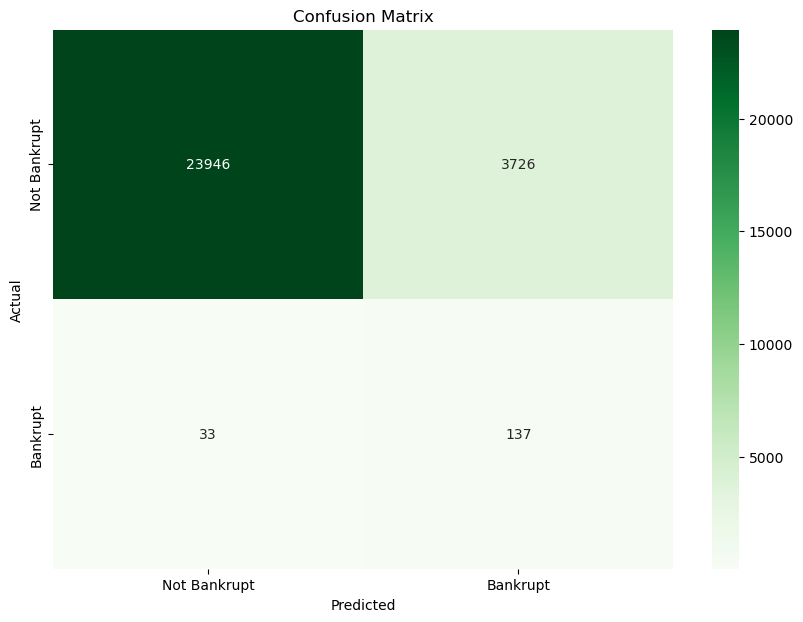

In [62]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_grid)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Not Bankrupt', 'Bankrupt'], yticklabels=['Not Bankrupt', 'Bankrupt'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## XG Boost

In [53]:
XGC = XGBClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 6, 10],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
    'objective': ['binary:logistic']
}
grid_search = GridSearchCV(XGC, param_grid, cv=2, n_jobs=-1, verbose=3, scoring='f1_macro')
grid_search.fit(scaled_X_train, y_train)

Fitting 2 folds for each of 48 candidates, totalling 96 fits


GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'learning_rate': [0.01, 0.1], 'max_depth': [3, 6, 10],
                         'n_estimators': [100, 200],
                         'objective': ['binary:logistic'],
                         'subsample': [0.8, 0.9]},
             scoring='f1_macro', verbose=3)

In [55]:
# Predict using the best model
y_pred = grid_search.predict(scaled_X_test)

In [56]:
class_report = classification_report(y_test, y_pred, target_names=['Not Bankrupt', 'Bankrupt'])

In [60]:
print("XG Boost Classification Report :")
print(class_report)

XG Boost Classification Report :
              precision    recall  f1-score   support

Not Bankrupt       1.00      0.99      0.99     27672
    Bankrupt       0.14      0.36      0.20       170

    accuracy                           0.98     27842
   macro avg       0.57      0.67      0.59     27842
weighted avg       0.99      0.98      0.99     27842



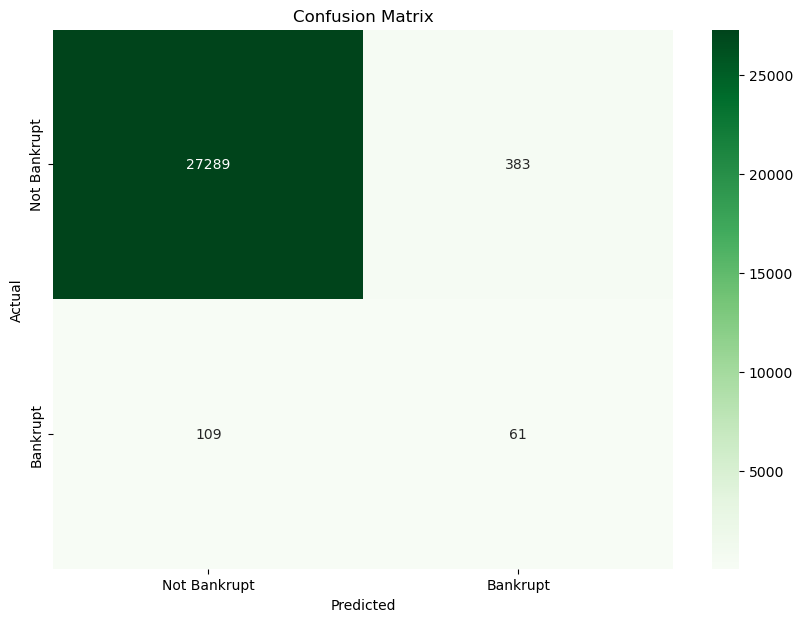

In [63]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Not Bankrupt', 'Bankrupt'], yticklabels=['Not Bankrupt', 'Bankrupt'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### The data I worked with had two main problems: there were significantly more instances of some classes compared to others (imbalanced classes), and there were extreme values that couldn't be easily removed (outliers). To tackle these issues, I first used a technique called SMOTE to create more data points for the minority classes, balancing out the class distribution. Since the data also had outliers, I applied a transformation method called Yeo-Johnson normalization to bring the values within a more normal range.

### For making predictions, I experimented with two machine learning models. One was XGBoost, which is known for its effectiveness. I fine-tuned the parameters of this model specifically focusing on a performance metric called F1-score, which is particularly useful for imbalanced datasets. The other model was a Random Forest classifier, configured to account for the class imbalance. To find the best possible settings for this model, I performed a grid search, which tries out a wide range of parameter combinations. Interestingly, both XGBoost and Random Forest ended up giving exactly the same predictions for the data.